Weather Decision Tree:
Prediction for new sample: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


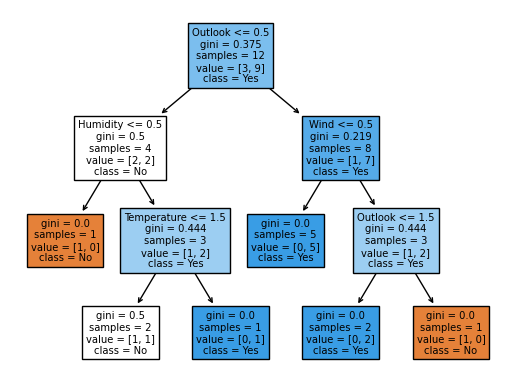

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
def weather_decision_tree():
    weather_data = pd.read_csv('weatherdata.csv')
    weather_data['Outlook'] = weather_data['Outlook'].map({'sunny': 0, 'overcast': 1, 'rain': 2})
    weather_data['Temperature'] = weather_data['Temperature'].map({'hot': 0, 'mild': 1, 'cool': 2})
    weather_data['Humidity'] = weather_data['Humidity'].map({'high': 0, 'normal': 1})
    weather_data['Wind'] = weather_data['Wind'].map({'weak': 0, 'strong': 1})
    weather_data['Answer'] = weather_data['Answer'].map({'no': 0, 'yes': 1})

    X = weather_data.drop('Answer', axis=1)
    y = weather_data['Answer']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    plot_tree(clf, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)

    new_sample = [[0, 1, 0, 0]]
    prediction = clf.predict(new_sample)
    print("Prediction for new sample:", prediction[0])
if __name__ == "__main__":
    print("Weather Decision Tree:")
    weather_decision_tree()


Drug Decision Tree:
Prediction for new patient: drugY


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


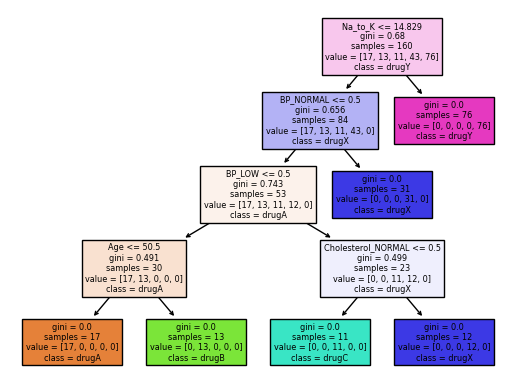

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import OneHotEncoder

# Function to preprocess data and train a decision tree
def preprocess_and_train():
    # Load drug data
    drug_data = pd.read_csv('drugdata.csv')

    # Convert categorical variables to numerical using one-hot encoding
    sex_encoder = OneHotEncoder(drop='first', sparse=False)
    bp_encoder = OneHotEncoder(drop='first', sparse=False)
    cholesterol_encoder = OneHotEncoder(drop='first', sparse=False)

    sex_encoded = sex_encoder.fit_transform(drug_data[['Sex']])
    bp_encoded = bp_encoder.fit_transform(drug_data[['BP']])
    cholesterol_encoded = cholesterol_encoder.fit_transform(drug_data[['Cholesterol']])

    sex_categories = sex_encoder.get_feature_names_out(['Sex'])
    bp_categories = bp_encoder.get_feature_names_out(['BP'])
    cholesterol_categories = cholesterol_encoder.get_feature_names_out(['Cholesterol'])

    encoded_data = np.hstack([drug_data[['Age', 'Na_to_K']].values, sex_encoded, bp_encoded, cholesterol_encoded])
    feature_names = ['Age', 'Na_to_K'] + sex_categories.tolist() + bp_categories.tolist() + cholesterol_categories.tolist()

    # Prepare features and target variable
    X = pd.DataFrame(encoded_data, columns=feature_names)
    y = drug_data['Drug']

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train decision tree classifier
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)

    # Plot decision tree
    plot_tree(clf, feature_names=feature_names, class_names=clf.classes_, filled=True)

    return clf, feature_names, sex_encoder, bp_encoder, cholesterol_encoder

# Function to classify a new patient
def classify_new_patient(clf, feature_names, sex_encoder, bp_encoder, cholesterol_encoder, new_patient_data):
    # Ensure new_patient_data has the same columns as the training data
    new_patient_df = pd.DataFrame([new_patient_data], columns=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'])

    # Encode new patient data
    sex_encoded = sex_encoder.transform(new_patient_df[['Sex']])
    bp_encoded = bp_encoder.transform(new_patient_df[['BP']])
    cholesterol_encoded = cholesterol_encoder.transform(new_patient_df[['Cholesterol']])

    encoded_data = np.hstack([new_patient_df[['Age', 'Na_to_K']].values, sex_encoded, bp_encoded, cholesterol_encoded])
    new_patient_encoded = pd.DataFrame(encoded_data, columns=feature_names)

    # Classify new patient
    prediction = clf.predict(new_patient_encoded)
    print("Prediction for new patient:", prediction[0])

# Main function
if __name__ == "__main__":
    print("Drug Decision Tree:")
    clf, feature_names, sex_encoder, bp_encoder, cholesterol_encoder = preprocess_and_train()

    # Example new patient data
    new_patient_data = [50, 'M', 'HIGH', 'HIGH', 25.355]  # You can modify this according to your requirement

    classify_new_patient(clf, feature_names, sex_encoder, bp_encoder, cholesterol_encoder, new_patient_data)








